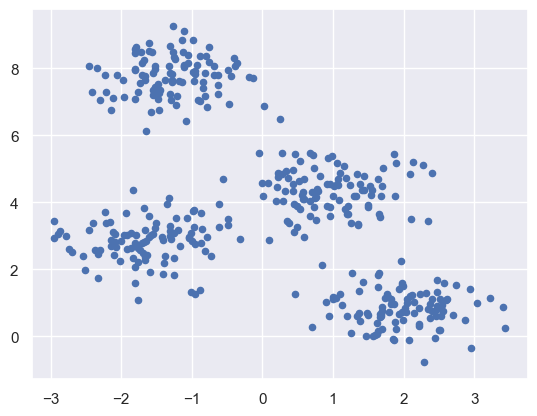

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 20)
plt.show()

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

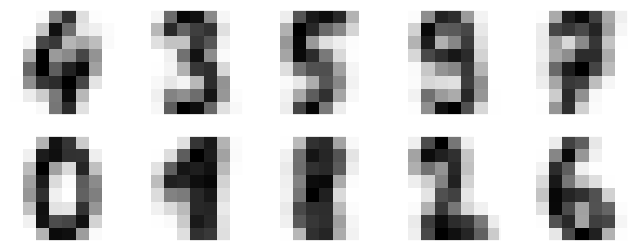

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

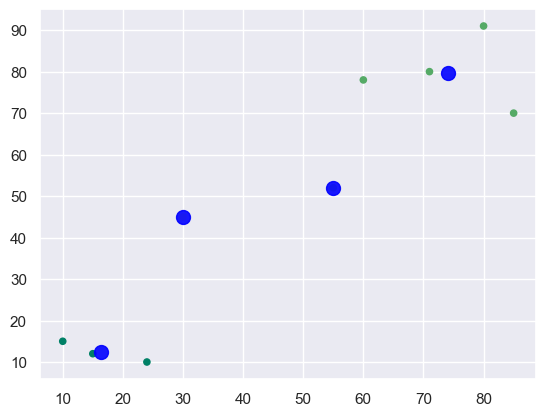

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

x = np.array([[10, 15],
             [15, 12],
             [24, 10],
             [30, 45],
             [85, 70],
             [71, 80],
             [60, 78],
             [55, 52],
             [80, 91]])

kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)


plt.scatter(x[:, 0], x[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9)
plt.show()

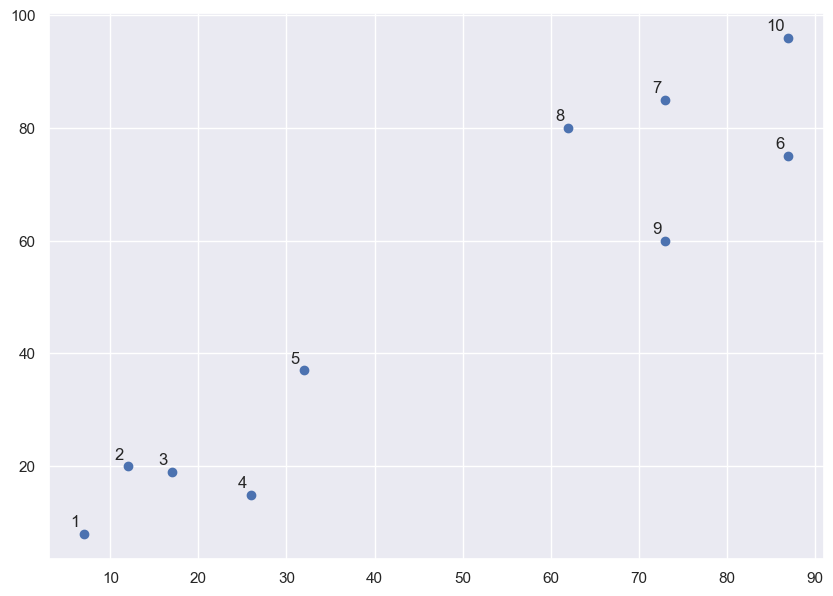

In [12]:
X = np.array([[7,8],[12,20],[17,19],[26,15],[32,37],[87,75],[73,85],[62,80],[73,60],[87,96],])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-3, 3),textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

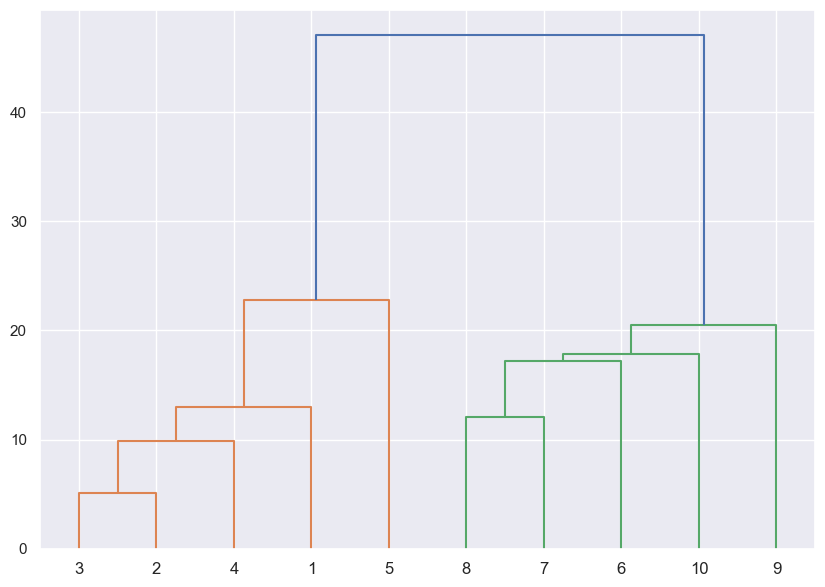

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10,7))
dendrogram(linked, orientation = 'top', labels = labelList, distance_sort = 'descending', show_leaf_counts = True)
plt.show()

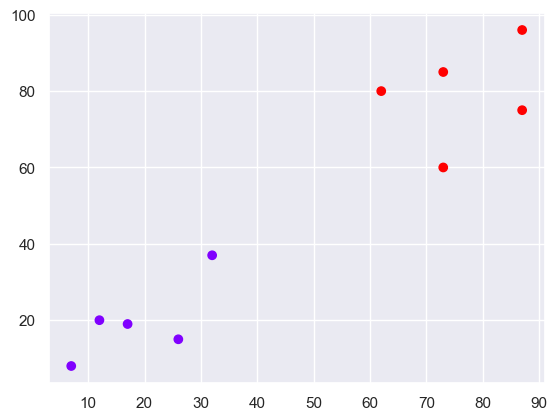

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = cluster.labels_, cmap='rainbow')

In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
customer_data.shape

(200, 5)

In [17]:
data = customer_data.iloc[:, 3:5].values

<Figure size 5040x2160 with 0 Axes>

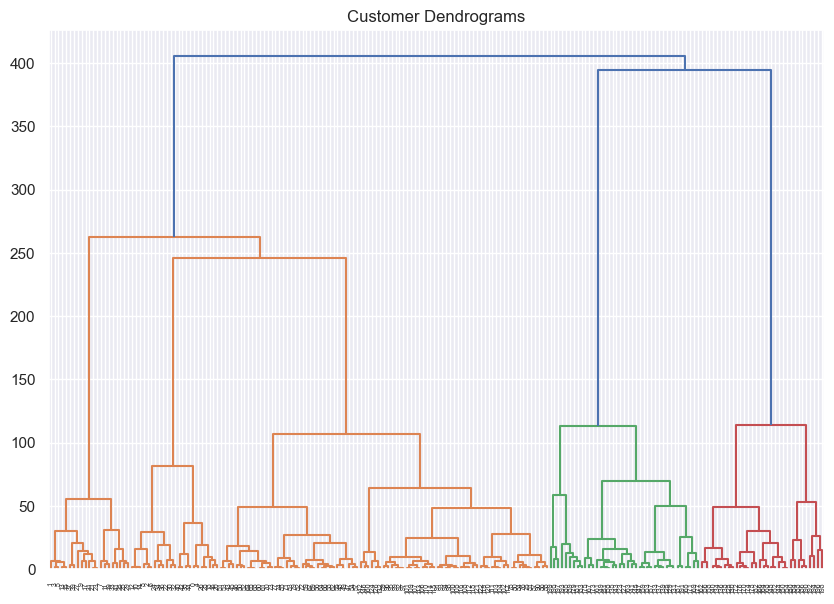

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [19]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

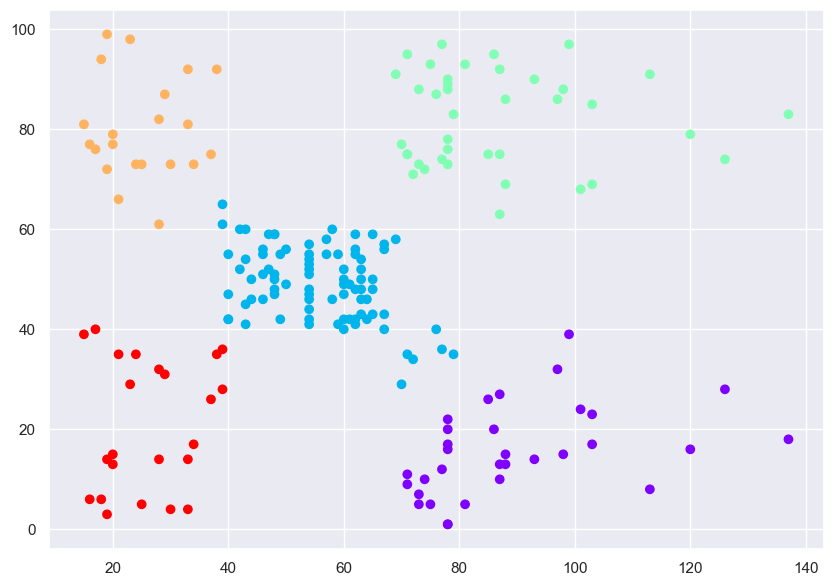

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

0.15555555555555556
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        17
           2       1.00      0.64      0.78        11

    accuracy                           0.16        45
   macro avg       0.33      0.21      0.26        45
weighted avg       0.24      0.16      0.19        45



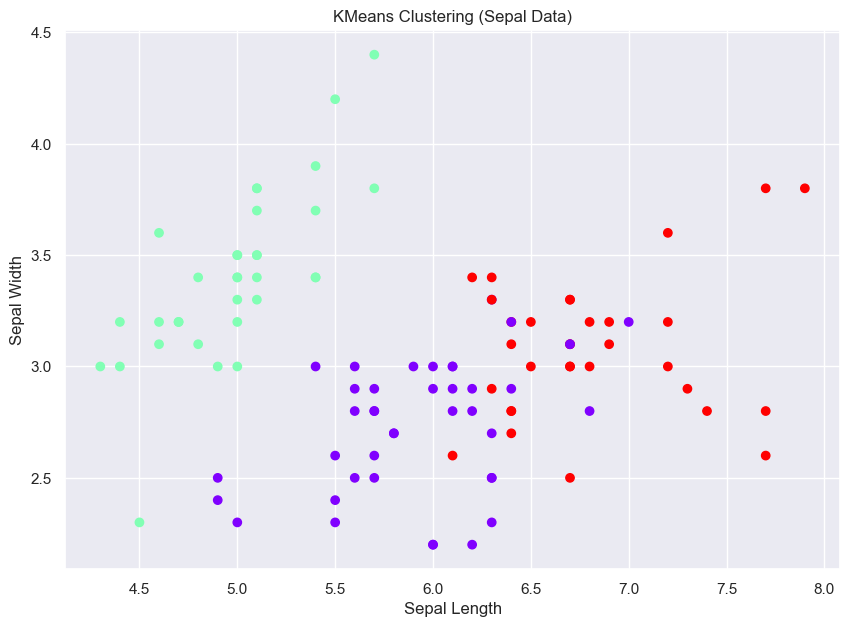

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn import datasets
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names 
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.3)
model = KMeans(n_clusters=3, random_state=0)
model.fit(train_data)
model_predictions = model.predict(test_data)

print (metrics.accuracy_score(test_labels, model_predictions))
print (metrics.classification_report(test_labels, model_predictions))

plt.figure(figsize=(10, 7))
plt.scatter(train_data['sepal length (cm)'], train_data['sepal width (cm)'], c=model.labels_, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering (Sepal Data)')

plt.show()

<Figure size 5040x2160 with 0 Axes>

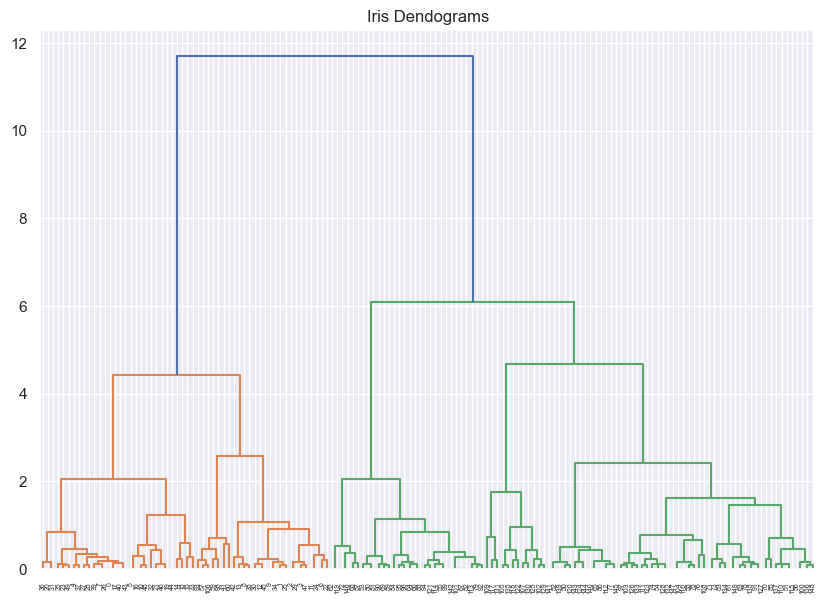

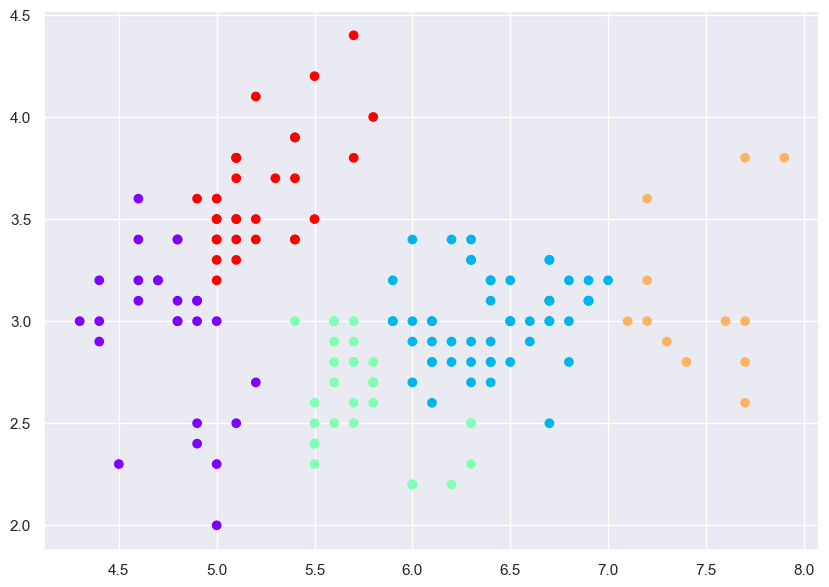

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris_data = pd.read_csv(url)
iris_data.head()
data = iris_data.iloc[:, 0:2].values
plt.figure(figsize=(28, 12), dpi = 180)
plt.figure(figsize=(10, 7))
plt.title("Iris Dendograms")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')